In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# let us set random seed:
np.random.seed(42)

#Define the number of samples - 100
num_samples = 100

#Generate the synthetic data
carbon_emission = np.random.uniform(50, 400, num_samples) # Emissions in kg CO2 units
renewability_index = np.random.uniform(0, 1, num_samples) # Index from a (non renewable) to 1 (Renewable)
energy_output = np.random.uniform(100, 1000, num_samples) # Energy output
cost_efficiency = np.random.uniform(0.5, 5, num_samples)  # Cost Efficiency Score

# Generate a binary variable based on acondition 
sustainability = [
    1 if (emission < 200 and renewability > 0.5 and cost < 3) else 0 
    for emission, renewability, cost in zip(carbon_emission, renewability_index, cost_efficiency)
]

# Create the dataframe
df = pd.DataFrame({
    'carbon_emission':carbon_emission,
    'renewability_index':renewability_index,
    'energy_output':energy_output,
    'cost_efficiency':cost_efficiency,
    'sustainability':sustainability
})

In [7]:
# Display the first 5 rows and last 5 rows
print(df.head())
print(df.tail())

   carbon_emission  renewability_index  energy_output  cost_efficiency  sustainability
0       181.089042            0.031429     677.828482         0.732568               0
1       382.750007            0.636410     175.725968         2.891096               0
2       306.197880            0.314356     245.465843         2.932858               0
3       259.530469            0.508571     908.698770         3.368435               0
4       104.606524            0.907566     645.786154         3.767411               0
    carbon_emission  renewability_index  energy_output  cost_efficiency  sustainability
95       222.828459            0.349210     570.018934         4.688408               0
96       232.956490            0.725956     792.994198         4.362857               0
97       199.639356            0.897110     294.238925         2.430473               1
98        58.896694            0.887086     660.601428         3.878920               0
99        87.761999            0.77987

In [8]:
df.isnull().sum() # to check the missing values - if missing values are present, use df = df.fillna(df.mean())

carbon_emission       0
renewability_index    0
energy_output         0
cost_efficiency       0
sustainability        0
dtype: int64

In [16]:
df.columns

Index(['carbon_emission', 'renewability_index', 'energy_output',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [12]:
# Feature selection 
X = df[['carbon_emission', 'energy_output', 'renewability_index', 'cost_efficiency']] # Features
y =df['sustainability'] #Target

In [13]:
# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [14]:
X_train.shape

(80, 4)

In [15]:
X_test.shape

(20, 4)

In [17]:
# Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score is {acc}')

Accuracy score is 0.95


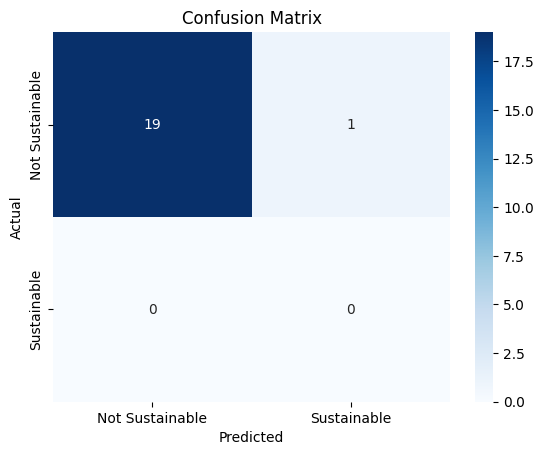

In [22]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       1.00      0.95      0.97        20
    Sustainable       0.00      0.00      0.00         0

       accuracy                           0.95        20
      macro avg       0.50      0.47      0.49        20
   weighted avg       1.00      0.95      0.97        20



C:\Users\91810\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91810\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91810\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [25]:
# Feature importance
coef = pd.DataFrame(model.coef_.T, index=X.columns, columns=['Coefficient'])
print(coef)

                    Coefficient
carbon_emission       -0.013189
energy_output          0.001610
renewability_index     1.344090
cost_efficiency       -0.584978


In [26]:
# Model Deployment 
import joblib
joblib.dump(model,'LogRegSustainable.pkl')

['LogRegSustainable.pkl']